# <p style="background-color:#0b032d;font-family:newtimeroman;color:#f4c095;font-size:150%;text-align:center ;border-radius:10px 10px;"> Análisis de Clústeres con K-Means </p>

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Importar data

In [2]:
data = pd.read_csv('data/telefonica.csv', sep= ";", index_col="IDCliente")
data.head(3)

,Genero,TerceraEdad,Casado,Dependientes,Meses,Telefono,LineasMultiples,Internet,Seguridad,BackUp,Proteccion,Soporte,StreamingTV,Peliculas,TipoContrato,FacturaElectronica,MetodoPago,UltimoCargo,TotalHistorico,Abandono
IDCliente,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,3,29.9,29.9,0
5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,4,57.0,1889.5,0
3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,4,53.9,108.2,1


In [3]:
data.describe()

,Genero,TerceraEdad,Casado,Dependientes,Meses,Telefono,LineasMultiples,Internet,Seguridad,BackUp,Proteccion,Soporte,StreamingTV,Peliculas,TipoContrato,FacturaElectronica,MetodoPago,UltimoCargo,TotalHistorico,Abandono
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,2.574329,64.786724,2279.824223,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.089772,2266.730338,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.300000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,35.500000,398.600000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,70.400000,1394.600000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.900000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,118.800000,8684.800000,1.000000


Nota: <br>

* Aparentemente no hay datos faltantes en ninguna de las variables
* En el data set contiene en igual proporcion tanto el genero masculino como femenino
* En promedio los clientes poseen dos años y 6 meses, no son clientes nuevos
* El %90,3 de los clientes tienen linea telefonica 
* El %42,1 de los clientes cuentan con multiples servicios 
* El %26,5 de los clientes abandonan la empresa.

## Mapa de calor

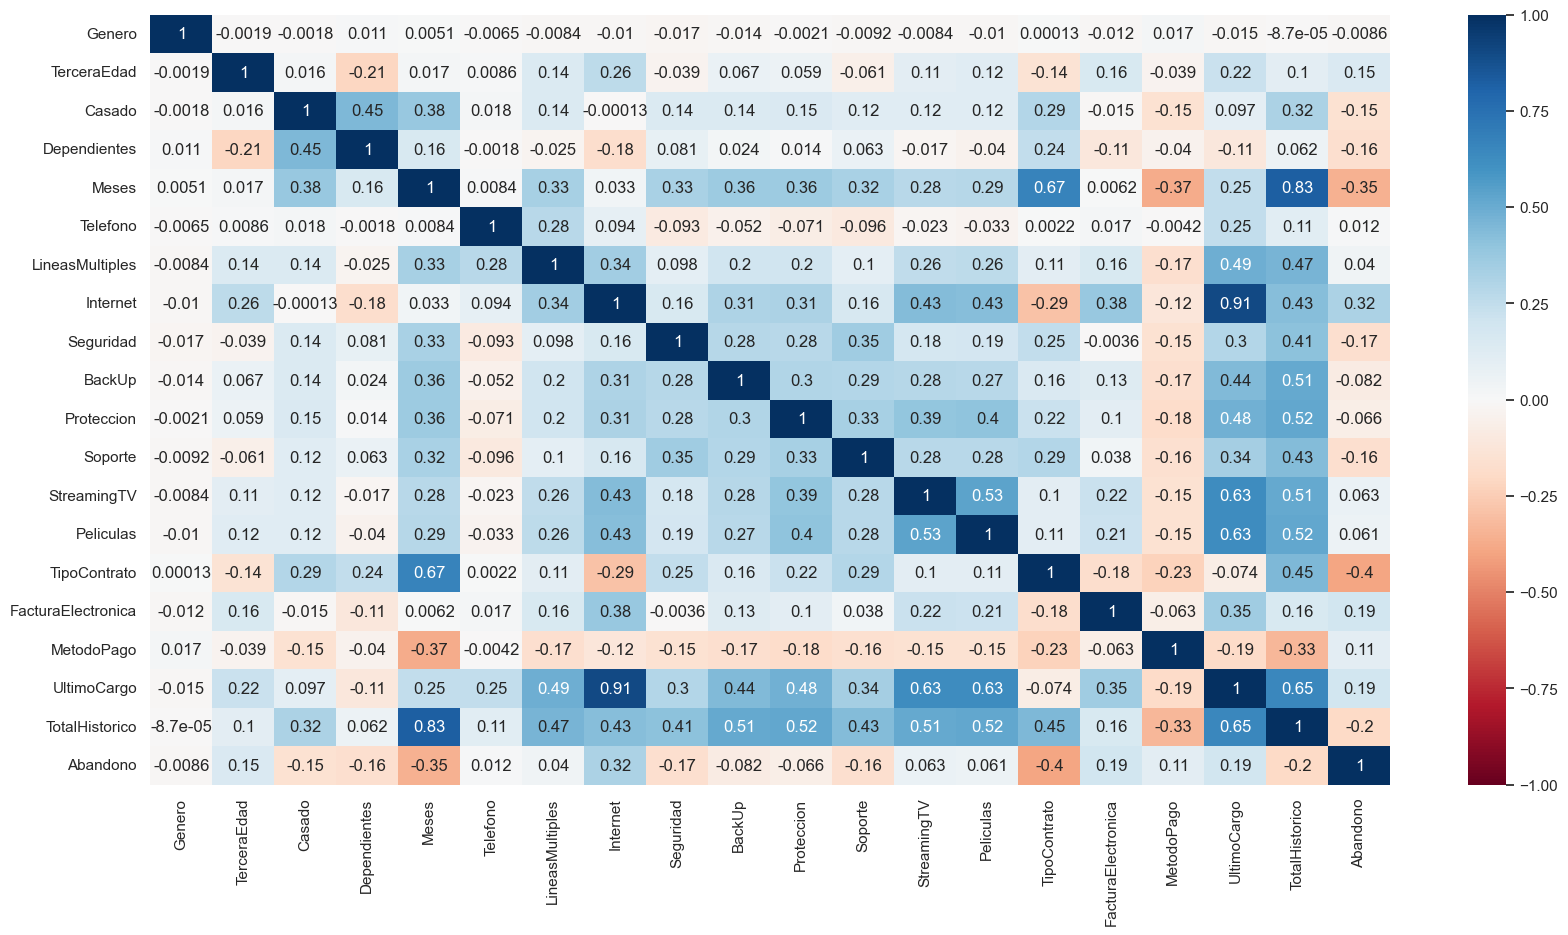

In [4]:
plt.figure(figsize= (20, 10))
sns.heatmap(
    data= data.corr(),
    annot= True,
    cmap="RdBu",
    vmin= -1,
    vmax= 1
)
plt.show()

Nota:

*Alta probabilidad de no abandono*<br>

* **tipo contrato:** Los clientes con contrato a un año o 2 años tienen menos probabilidad de abandono
* **meses:**: Los clientes antiguos tienen menos probabilidades de abandono
* **casados:**
* **dependientes** o personas a su cargo
* **Soporte:** Clientes con soporte tecnico 

*Alta probabilidad de abandono*<br>

* **Personas con internet** 
* **Tercera edad**
* **factura electronica** 
* **MetodoPago:** Entre más complejo sea el metodo de pago mas probabilidades de abandono
* **Factura electronica:** 
* **Striming tv** y **Deportes** : cada una pesa alrededor del %6 respectivamente 

## Estandarizar datos

In [5]:
# crear objeto standar
standar = StandardScaler()

# Estandarizar los datos
data_std = standar.fit_transform(data)

In [6]:
# Mostrar datos, Estos datos muestras a cuantas desviaciones estandar están los datos 
data_std

array([[-1.00955867, -0.43991649,  1.03453023, ..., -1.15950368,
        -0.99265622, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.25880147,
        -0.17220925, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.36183383,
        -0.95811062,  1.66382851],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -1.16947456,
        -0.85297376, -0.60102348],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.31950917,
        -0.87057745,  1.66382851],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.35980361,
         2.01391396, -0.60102348]])

## Determinar  K con el método del codo

Within cluster sum of squares = suma de cuadrados dentro delos clusteres (varianza)

In [7]:
# calcular el within cluster sum of square
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters= i, init= "k-means++", random_state= 1)
    kmean.fit(data_std)
    wcss.append(kmean.inertia_)

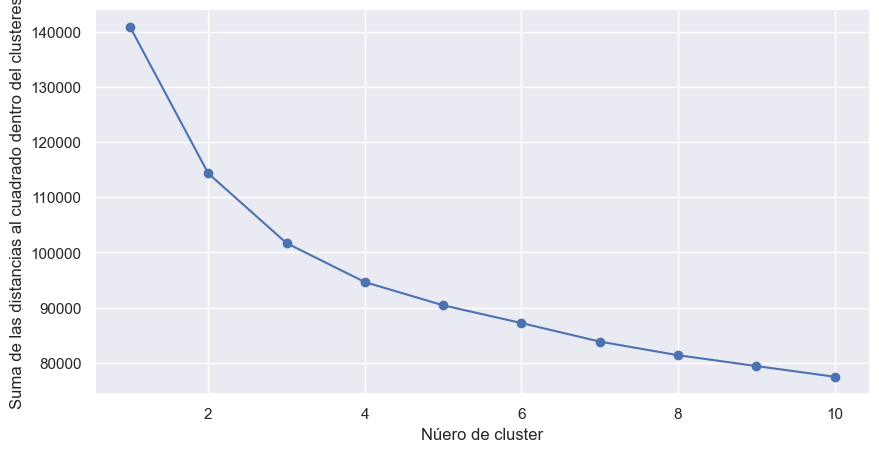

In [8]:
plt.figure( figsize = (10,5))
plt.plot(range(1,11), wcss, marker = "o")
plt.xlabel('Núero de cluster')
plt.ylabel('Suma de las distancias al cuadrado dentro del clusteres')
plt.show()

**Nota:**
+ Apartir de cluster "4" la variaza no cambia en gran medida.
+ Los candidatos sestá en el cluster 4 y 5, eneste caso se tomará el 4